**Quiz Computer Vision**

**Kelompok 10**

Anggota Kelompok:

Nama  : Rio Pramana, Debora

NIM   : 2440016804, 2440087214

Kelas : LA01

# Import libraries

In [1]:
#import libraries
import cv2 
from matplotlib import pyplot as plt
import numpy as np
from os import listdir
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load dataset

In [2]:
TRAIN_PATH = './input'
TEST_PATH = './test_images'

For each image, we will resize the image to having a width of 128 and height of 256. Based on the original paper (http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf), it is best to resize the image into having a ratio of 1:2 and preferably be 64 x 128 as it will make the feature extraction simpler. But, we decided to make it 128 x 256 so we will not lose too much information on each image as the dataset contains images with really high dimensions

In [3]:
def get_train_dataset(path):
    category_list = listdir(path)
    images = []
    classes_id = []
    class_id = 0

    for category in category_list:
        CLASSES_PATH = f"{path}/{category}"
        for class_name in listdir(CLASSES_PATH):
            class_path = f"{CLASSES_PATH}/{class_name}"
            for filename in listdir(class_path):
                image = cv2.resize(cv2.imread(f"{class_path}/{filename}"), (128,256), interpolation = cv2.INTER_AREA)
                images.append(image)
                classes_id.append(class_id)
            class_id += 1

    return images, classes_id

def get_test_dataset(path):
    category_list = listdir(path)
    images = []

    for category in category_list:
        CLASSES_PATH = f"{path}/{category}"
        for filename in listdir(CLASSES_PATH):
            image = cv2.resize(cv2.imread(f"{CLASSES_PATH}/{filename}"), (128,256), interpolation = cv2.INTER_AREA)
            images.append(image)

    return images

In [4]:
train_images, train_classes = get_train_dataset(TRAIN_PATH)
test_images = get_test_dataset(TEST_PATH)

# Extract HOG descriptors from images

To extract the features of each image, the image will be divided into 8x8 and 16x16 patches. We used hog() function from skimage library to get the HOG descriptors from each image. For the hyperparameters, we will be following the original paper where it used 9 orientation bins with 16 x 16 pixel blocks of for 8 x 8 pixels per cell

The multichannel is also set to true because the input image is not a grayscale image

In [5]:
def get_image_features(img_list):
    images_features = []
    for img in img_list:
        features = hog(img, orientations = 9, pixels_per_cell = (8, 8), cells_per_block = (2, 2), multichannel = True)
        images_features.append(features)
    
    return images_features

In [6]:
train_images_features = get_image_features(train_images)
test_images_features = get_image_features(test_images)

# Image classification

In [7]:
print(len(train_images))

39


In [8]:
print(len(train_images_features[0]))

16740


For the model, we choose to use linear SVM/SVC as it was also used in the original paper. One strong reason to choose linear SVC is it is good for datasets where the number of features in each image is way higher compared to the number of images in that dataset. It is also a good model to choose for multi-class image classification

In [9]:
#Classification
svc = LinearSVC()
svc.fit(train_images_features, np.array(train_classes))

LinearSVC()

In [10]:
classes_names = ['daffodil', 'lily', 'rose', 'sunflower', 'car', 'cup', 'person']
train_pred = svc.predict(train_images_features)
print(classification_report(train_classes, train_pred, target_names = classes_names))

              precision    recall  f1-score   support

    daffodil       1.00      1.00      1.00         6
        lily       1.00      1.00      1.00         6
        rose       1.00      1.00      1.00         6
   sunflower       1.00      1.00      1.00         6
         car       1.00      1.00      1.00         5
         cup       1.00      1.00      1.00         5
      person       1.00      1.00      1.00         5

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



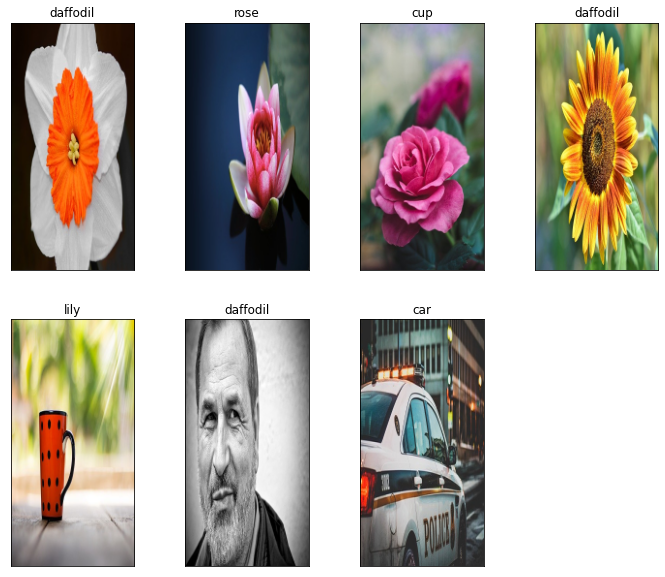

In [11]:
test_pred = svc.predict(test_images_features)
plt.figure(figsize=(12,10))
for index, (result, image) in enumerate(zip(test_pred, test_images)):
    plt.subplot(2, 4, index+1)
    plt.title(classes_names[test_pred[index]])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
plt.show()

The results of the test dataset are not good, the model was only able to correctly predict 2 out of 7 images in the test dataset. However, the reasons are probably because of how small the dataset is (each class only contains around 5-6 images) and the original dimensions of the images were not ideal (ideally we want images with 1:2 ratio for its dimensions) so there might be information loss by resizing the image drastically

We believe if the dataset is much bigger and the dimensions are more ideal, the model would perform much better